In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Compute/DE/breast_cancer_survival - breast_cancer_survival_.csv.csv')

In [ ]:
df.head(5)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [ ]:
df.shape

(334, 15)

In [ ]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

# Hadling missing values
Detecting Duplicate and Null values and Handling the values  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['Date_of_Last_Visit','Patient_Status']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

Date_of_Last_Visit: 5.09%
Patient_Status: 3.89%


null values are very less hence droping them as it wouldnt make a difference

In [ ]:
df.dropna(subset=['Date_of_Last_Visit','Patient_Status'], inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


# Data PreProcessing
Converting to apropriate data type for further use

In [ ]:
df['Tumour_Stage'].unique()

array(['II', 'I', 'III'], dtype=object)

In [ ]:
df['Tumour_Stage'] = df['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3})

In [ ]:
df['Gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

Male in gender is not possible hence replacing it with female

In [ ]:
df['Gender'] = df['Gender'].replace({'MALE' : 'FEMALE'})

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
df[['Day_of_Sugrery', 'Month_of_Sugrery','Year_of_Sugrery']] = df['Date_of_Surgery'].str.split('-', expand=True)

In [ ]:
df[['Day_of_Last_Visit', 'Month_of_Last_Visit','Year_of_Last_Visit']] = df['Date_of_Last_Visit'].str.split('-', expand=True)

In [ ]:
df['Month_of_Sugrery'] = df['Month_of_Sugrery'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 })

In [ ]:
df['Month_of_Last_Visit'] = df['Month_of_Last_Visit'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 })

In [ ]:
df=df.drop(columns=['Date_of_Surgery'],axis=1)
df=df.drop(columns=['Date_of_Last_Visit'],axis=1)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Day_of_Sugrery,Month_of_Sugrery,Year_of_Sugrery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,20,5,18,26,8,18
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,26,4,18,25,1,19
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive,24,8,18,08,4,20
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,16,11,18,28,7,20
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive,12,12,18,05,1,19


Checking for any discrepancies

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  317 non-null    int64  
 1   Gender               317 non-null    object 
 2   Protein1             317 non-null    float64
 3   Protein2             317 non-null    float64
 4   Protein3             317 non-null    float64
 5   Protein4             317 non-null    float64
 6   Tumour_Stage         317 non-null    int64  
 7   Histology            317 non-null    object 
 8   ER status            317 non-null    object 
 9   PR status            317 non-null    object 
 10  HER2 status          317 non-null    object 
 11  Surgery_type         317 non-null    object 
 12  Patient_Status       317 non-null    object 
 13  Day_of_Sugrery       317 non-null    object 
 14  Month_of_Sugrery     317 non-null    int64  
 15  Year_of_Sugrery      317 non-null    object 


In [68]:
df['Day_of_Sugrery'] = df['Day_of_Sugrery'].astype(int)
df['Year_of_Sugrery'] = df['Year_of_Sugrery'].astype(int)
df['Day_of_Last_Visit'] = df['Day_of_Last_Visit'].astype(int)
df['Year_of_Last_Visit'] = df['Year_of_Last_Visit'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  317 non-null    int64  
 1   Gender               317 non-null    object 
 2   Protein1             317 non-null    float64
 3   Protein2             317 non-null    float64
 4   Protein3             317 non-null    float64
 5   Protein4             317 non-null    float64
 6   Tumour_Stage         317 non-null    int64  
 7   Histology            317 non-null    object 
 8   ER status            317 non-null    object 
 9   PR status            317 non-null    object 
 10  HER2 status          317 non-null    object 
 11  Surgery_type         317 non-null    object 
 12  Patient_Status       317 non-null    object 
 13  Day_of_Sugrery       317 non-null    int64  
 14  Month_of_Sugrery     317 non-null    int64  
 15  Year_of_Sugrery      317 non-null    int64  


# Outlier Detection

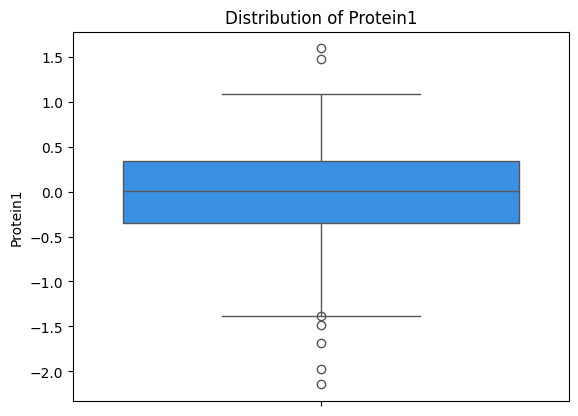

In [ ]:
# we'll use Seaborn to create the box plot
sns.boxplot(data=df, y='Protein1', color='dodgerblue').set(title='Distribution of Protein1')
plt.show()

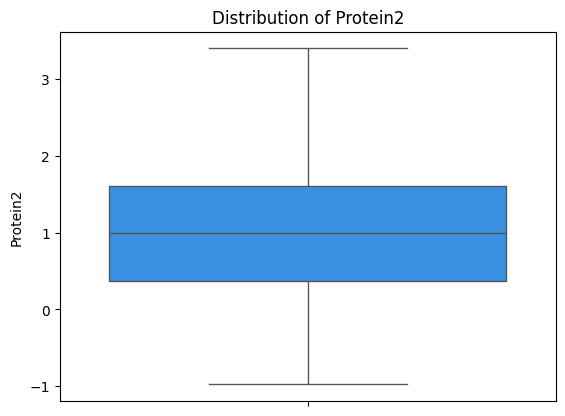

In [ ]:
# we'll use Seaborn to create the box plot
sns.boxplot(data=df, y='Protein2', color='dodgerblue').set(title='Distribution of Protein2')
plt.show()

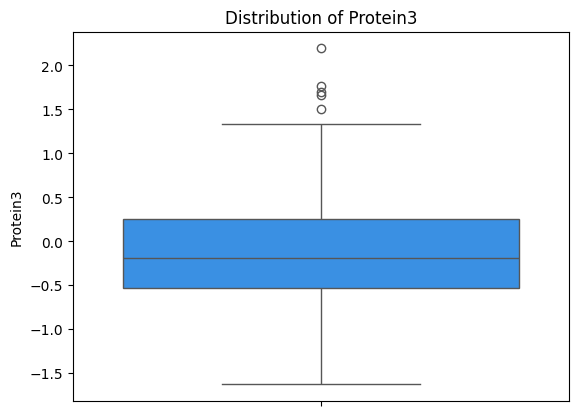

In [ ]:
# we'll use Seaborn to create the box plot
sns.boxplot(data=df, y='Protein3', color='dodgerblue').set(title='Distribution of Protein3')
plt.show()

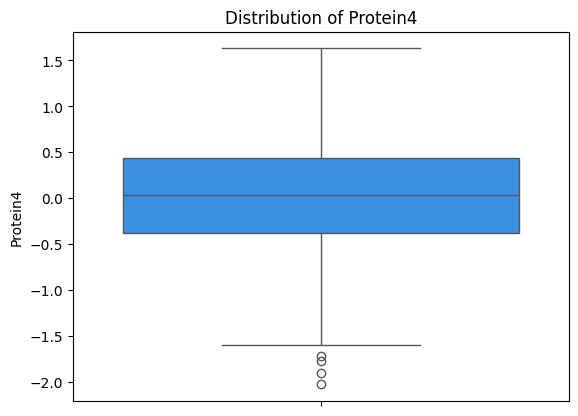

In [ ]:
# we'll use Seaborn to create the box plot
sns.boxplot(data=df, y='Protein4', color='dodgerblue').set(title='Distribution of Protein4')
plt.show()

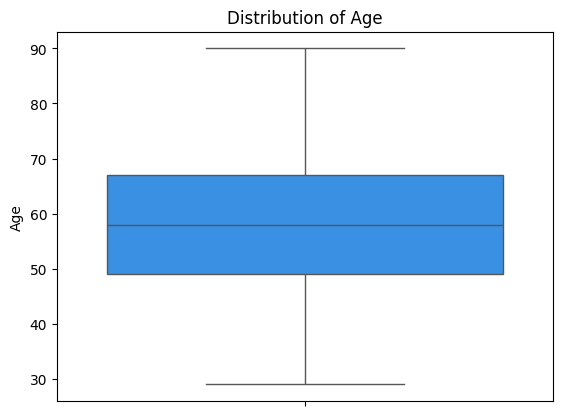

In [ ]:
# we'll use Seaborn to create the box plot
sns.boxplot(data=df, y='Age', color='dodgerblue').set(title='Distribution of Age')
plt.show()

Removing Outliers

In [ ]:
def remove_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = ['Protein1', 'Protein3','Protein4']
df = remove_outliers_iqr(df, columns_to_check)


# Visualizations

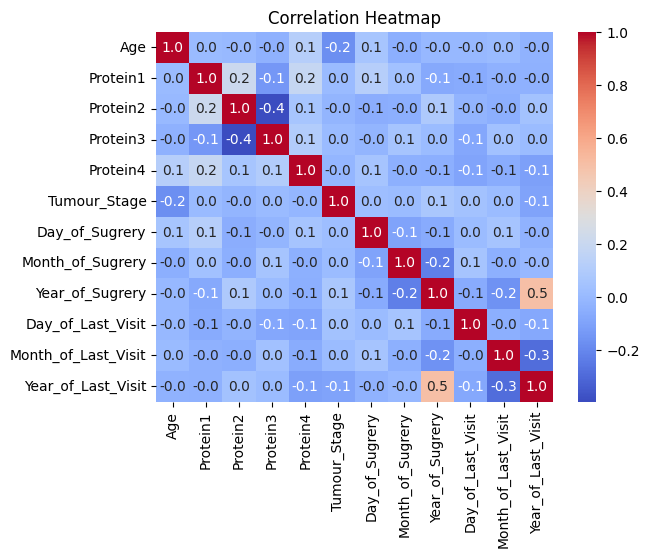

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

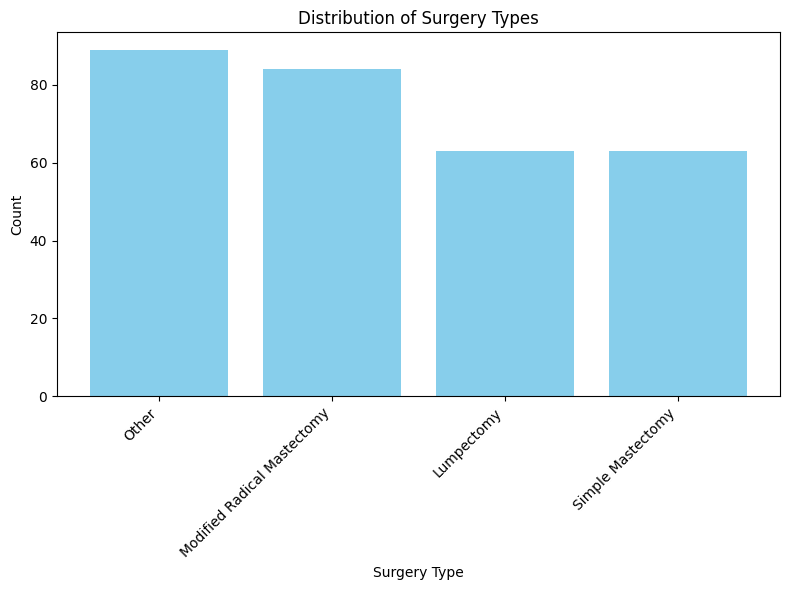

In [ ]:
surgery_counts = df['Surgery_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(surgery_counts.index, surgery_counts.values, color='skyblue')
plt.xlabel("Surgery Type")
plt.ylabel("Count")
plt.title("Distribution of Surgery Types")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

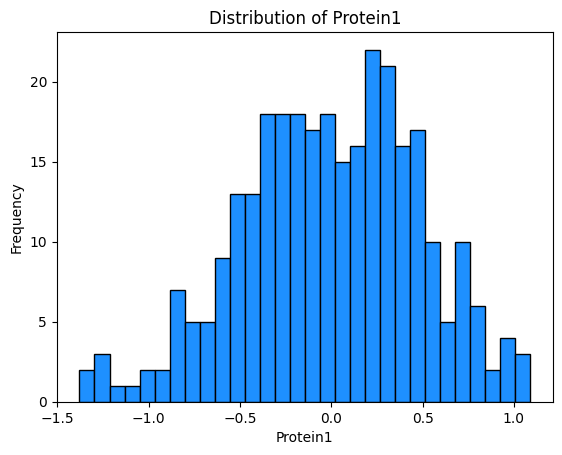

In [ ]:
plt.hist(df['Protein1'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein1')
plt.xlabel('Protein1')
plt.ylabel('Frequency')
plt.show()

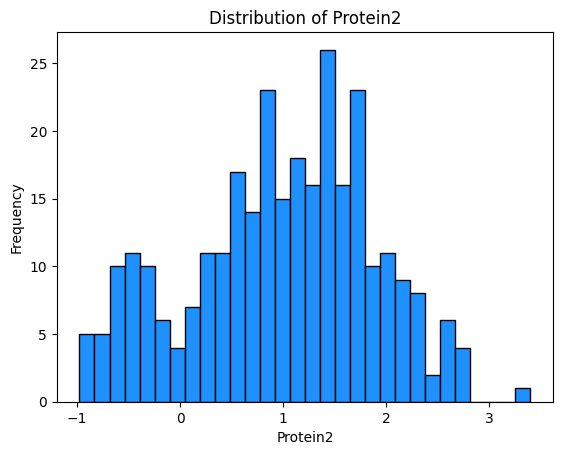

In [ ]:
plt.hist(df['Protein2'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein2')
plt.xlabel('Protein2')
plt.ylabel('Frequency')
plt.show()

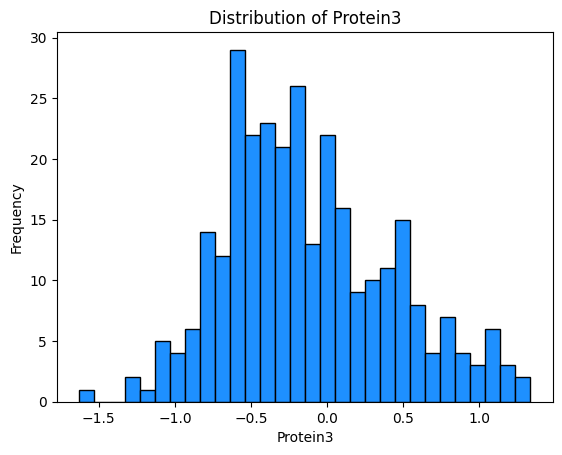

In [ ]:
plt.hist(df['Protein3'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein3')
plt.xlabel('Protein3')
plt.ylabel('Frequency')
plt.show()

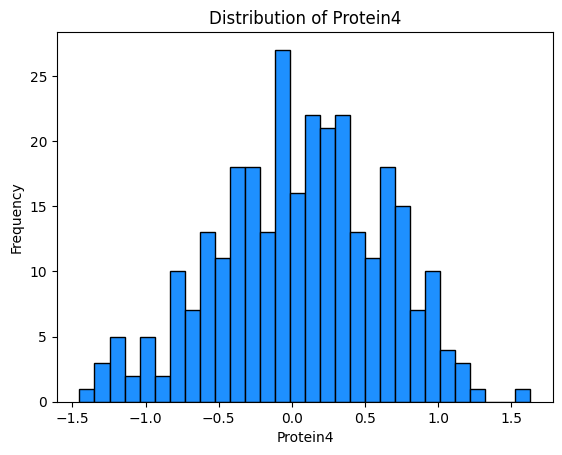

In [ ]:
plt.hist(df['Protein4'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein4')
plt.xlabel('Protein4')
plt.ylabel('Frequency')
plt.show()

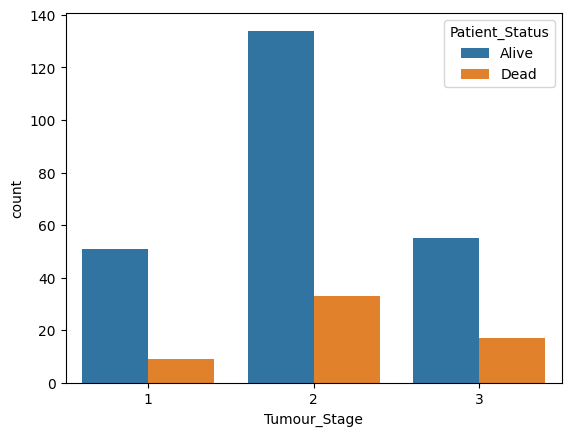

In [ ]:
sns.countplot(x='Tumour_Stage', hue='Patient_Status', data=df)
plt.show()

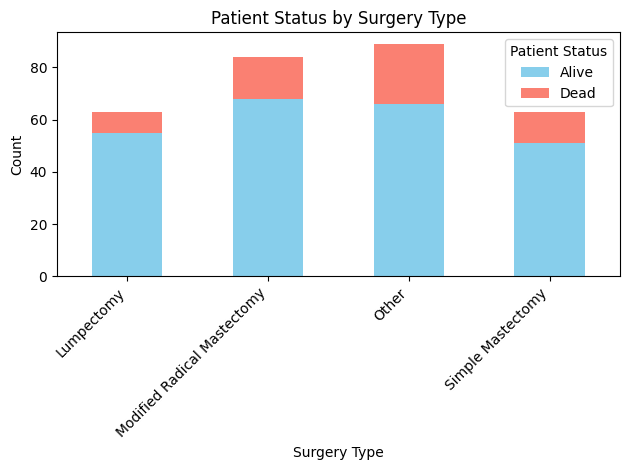

In [ ]:
surgery_status_counts = df.groupby(['Surgery_type', 'Patient_Status']).size().unstack()

surgery_status_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.xlabel("Surgery Type")
plt.ylabel("Count")
plt.title("Patient Status by Surgery Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Patient Status')
plt.tight_layout()
plt.show()


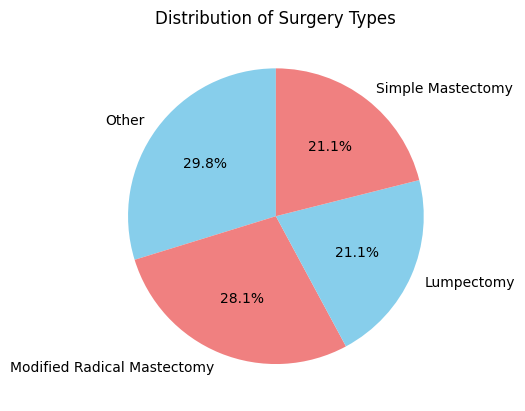

In [ ]:
surgery_counts = df['Surgery_type'].value_counts()

plt.pie(surgery_counts, labels=surgery_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Surgery Types')
plt.show()

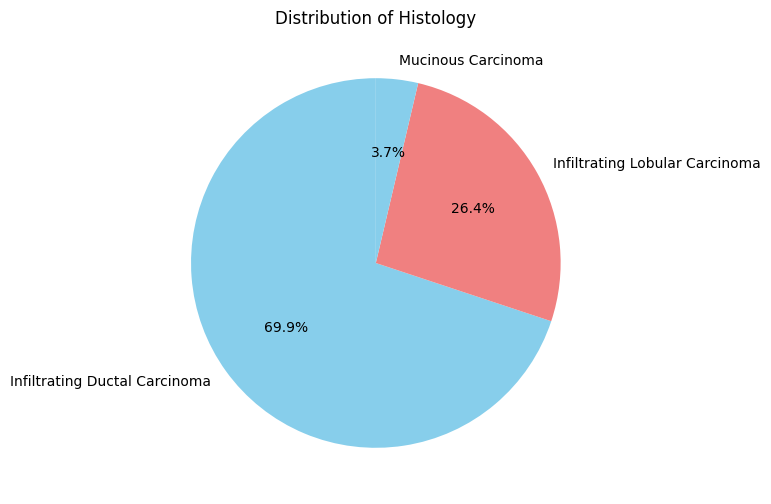

In [ ]:
histology_counts = df['Histology'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(histology_counts.values, labels=histology_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Histology')
plt.show()

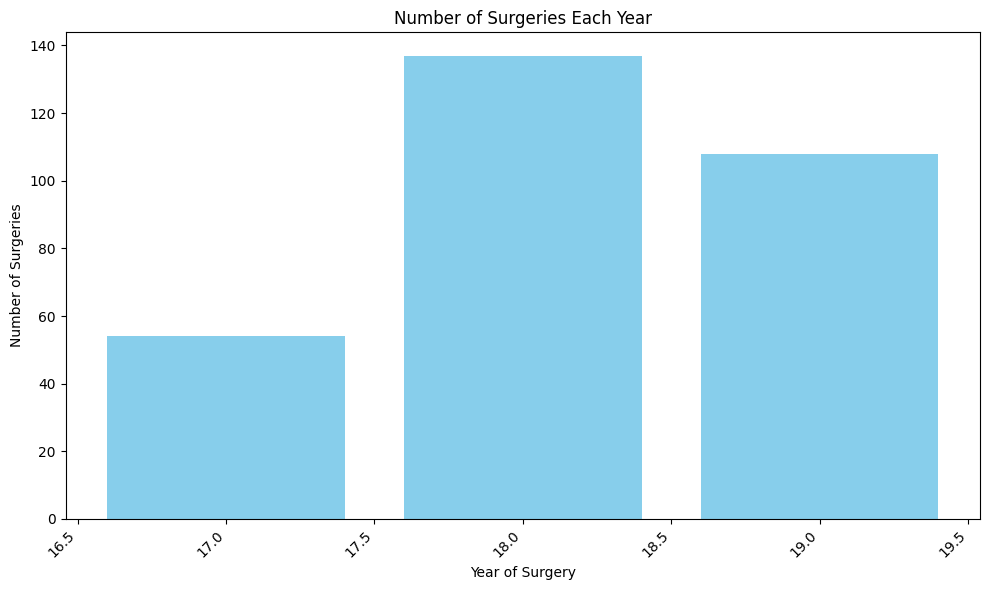

In [ ]:
surgery_counts = df.groupby('Year_of_Sugrery')['Gender'].count()

plt.figure(figsize=(10, 6))
plt.bar(surgery_counts.index, surgery_counts.values, color='skyblue')
plt.xlabel("Year of Surgery")
plt.ylabel("Number of Surgeries")
plt.title("Number of Surgeries Each Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


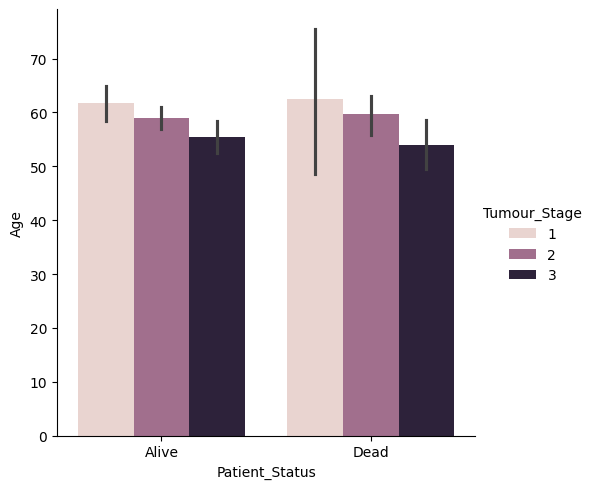

In [ ]:
sns.catplot(x='Patient_Status', y='Age', hue='Tumour_Stage', data=df, kind='bar')
plt.show()

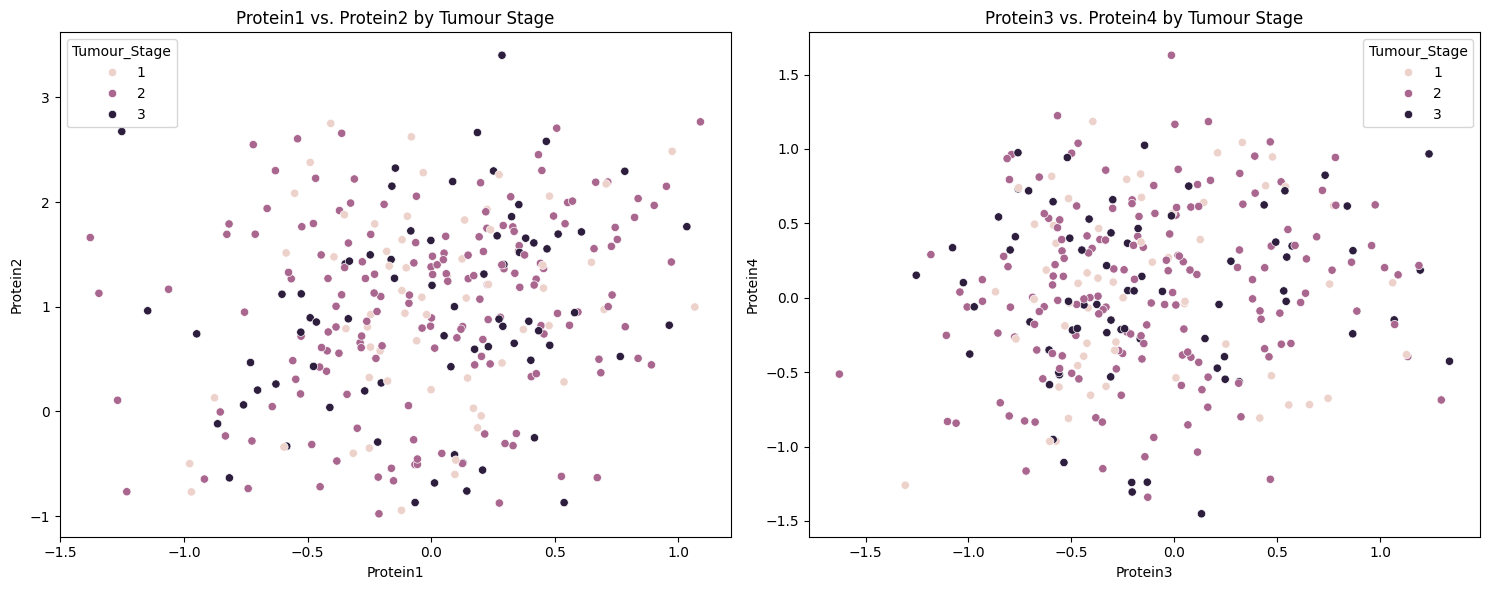

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Protein1', y='Protein2', data=df, hue='Tumour_Stage')
plt.title('Protein1 vs. Protein2 by Tumour Stage')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Protein3', y='Protein4', data=df, hue='Tumour_Stage')
plt.title('Protein3 vs. Protein4 by Tumour Stage')

plt.tight_layout()
plt.show()

There is a noticible spread but no clear linear relationship between the protiens.  

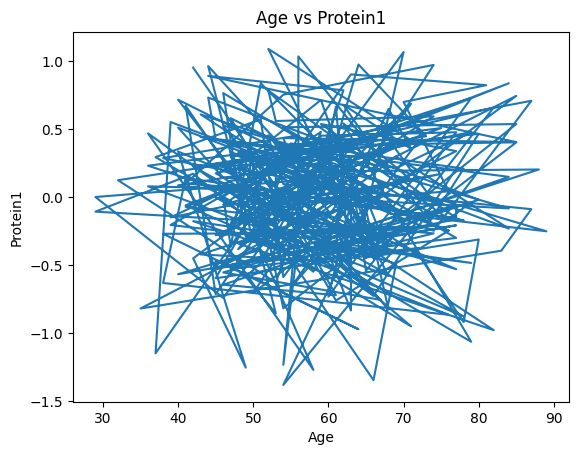

In [ ]:
plt.plot(df['Age'], df['Protein1'])
plt.xlabel('Age')
plt.ylabel('Protein1')
plt.title('Age vs Protein1')
plt.show()

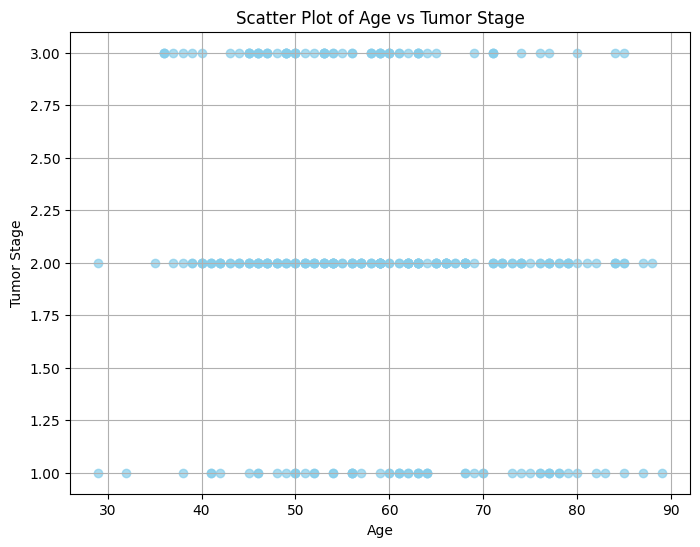

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Tumour_Stage'], color='skyblue', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Tumor Stage")
plt.title("Scatter Plot of Age vs Tumor Stage")
plt.grid(True)
plt.show()


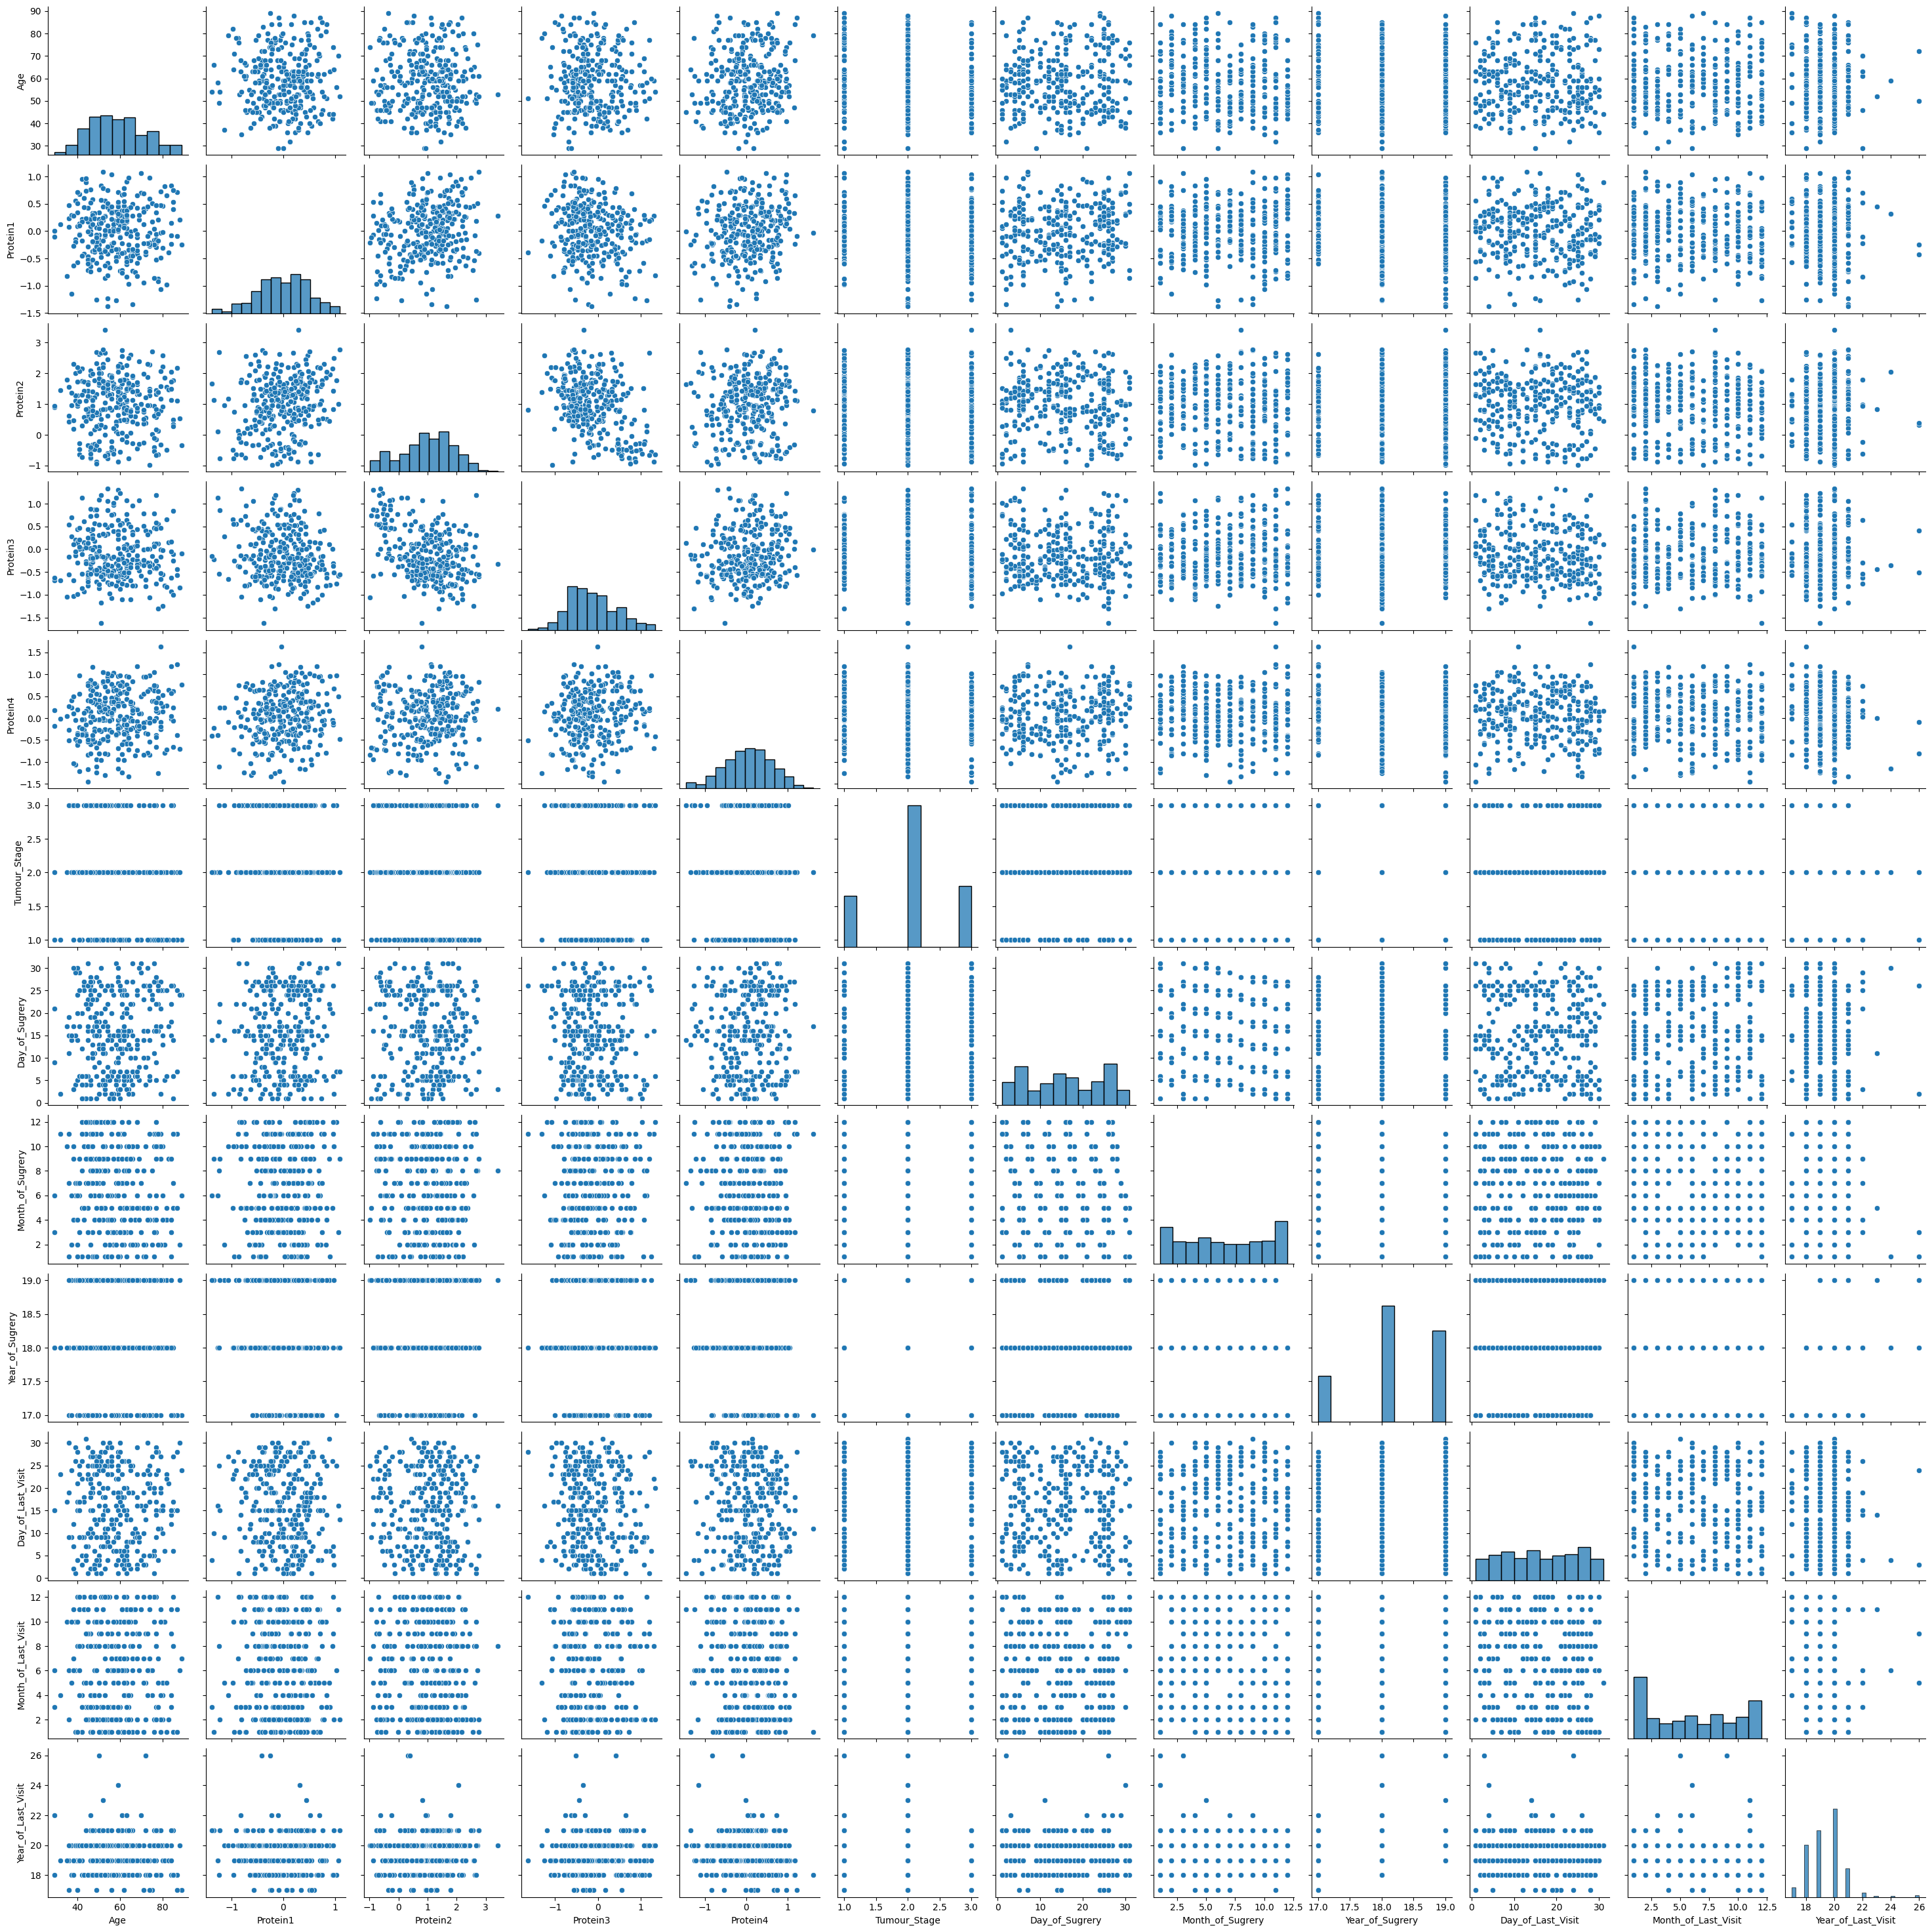

In [ ]:
sns.pairplot(df)
plt.show()

<ipython-input-39-cceb0a99bdbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tumour_Stage', y='Age', data=df, palette='muted')


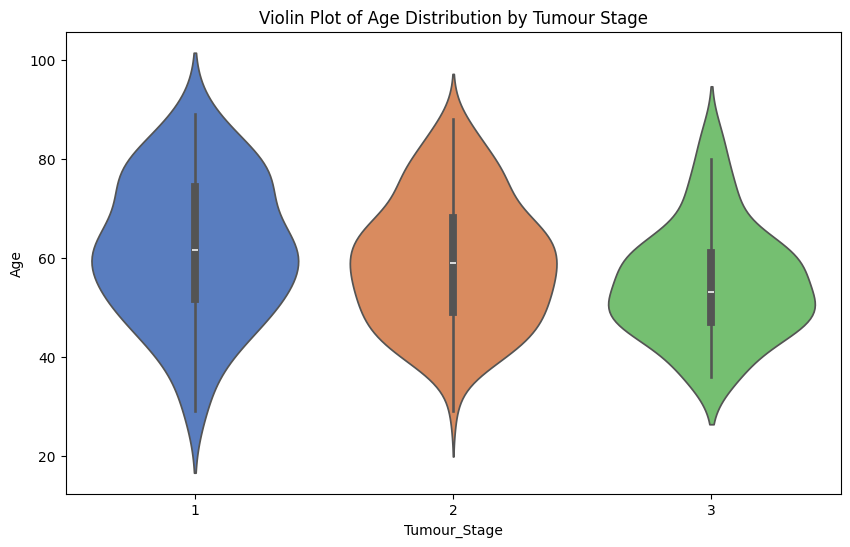

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Tumour_Stage', y='Age', data=df, palette='muted')
plt.title('Violin Plot of Age Distribution by Tumour Stage')
plt.show()

# Model fitting

In [ ]:
df1=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Patient_Status'] = label_encoder.fit_transform(df1['Patient_Status'])
df1['ER status'] = label_encoder.fit_transform(df1['ER status'])
df1['PR status'] = label_encoder.fit_transform(df1['PR status'])
df1['HER2 status'] = label_encoder.fit_transform(df1['HER2 status'])


In [ ]:
df1 = pd.get_dummies(df1, columns=['Surgery_type','Histology'],dtype=int)
df1.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,ER status,PR status,HER2 status,...,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,2,0,0,0,...,26,8,18,0,0,1,0,1,0,0
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,2,0,0,0,...,25,1,19,0,0,1,0,1,0,0
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,2,0,0,0,...,8,4,20,1,0,0,0,1,0,0
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,1,0,0,0,...,28,7,20,0,0,1,0,1,0,0
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,2,0,0,1,...,5,1,19,1,0,0,0,1,0,0


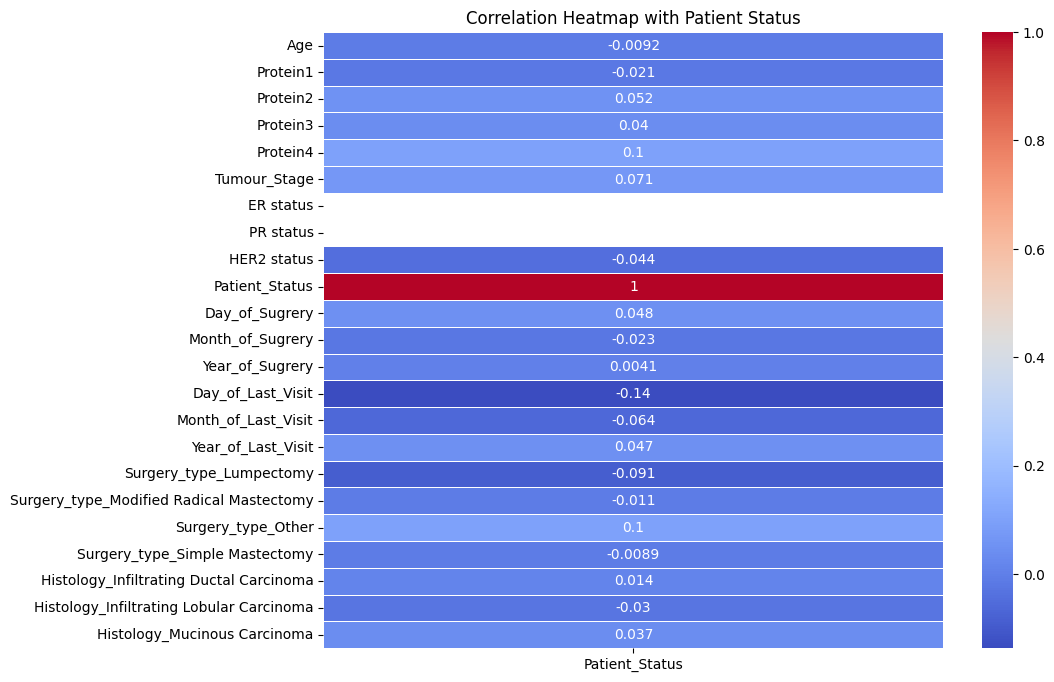

In [ ]:
correlation_matrix = df1.corr(numeric_only=True)

# Extract the correlation of each feature with the 'Risk_Category'
risk_category_corr = correlation_matrix[['Patient_Status']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(risk_category_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Patient Status')
plt.show()


In [69]:
df1 = df1.drop(columns=['Gender'])

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df1.drop('Patient_Status', axis=1)
y = df1['Patient_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8833333333333333
